### About the Dataset

Clustering the Countries by using Unsupervised Learning for HELP International
Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### About the columns

<ul>
    <li>country: 
 Name of the country</li>
    <li>child_mort:
 Death of children under 5 years of age per 1000 live births</li>
    <li>exports:
 Exports of goods and services per capita. Given as %age of the GDP per capita</li>
    <li>health:
 Total health spending per capita. Given as %age of GDP per capita</li>
    <li>imports:
 Imports of goods and services per capita. Given as %age of the GDP per capita</li>
    <li>income:
 Net income per person</li>
    <li>inflation:
 The measurement of the annual growth rate of the Total GDP</li>
    <li>life_expec:
 The average number of years a new born child would live if the current mortality patterns are to remain the same</li>
    <li>total_fer:
 The number of children that would be born to each woman if the current age-fertility rates remain the same.</li>
    <li>gdpp:
 The GDP per capita. Calculated as the Total GDP divided by the total population.</li>
    
</ul>

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
data = pd.read_csv(r"C:\Users\Windows\Desktop\unsupervised-dataset\Country-data.csv")

## Read the dataset

In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.shape ## Our dataset has 167 rows with 10 columns

(167, 10)

### Check for null values

In [5]:
data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

###### As we can see there is no null values

#### Duplicates check

In [6]:
data.duplicated().any()

False

###### No duplicates rows

In [7]:
data.info() #information about dataset lik  non-null vlaue,datatypes, and columns name.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Importing the dataset

In [8]:
x = data.drop('country',axis=1)

In [9]:
print(x)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

### Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x);
print(x)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


### K-means clustering

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

#### Steps for performing k-means clustering

<ol>
    <li> Choose the number of k of cluster.</li>
    <li>Select Random k points, the centroids.(Not necessarily your dataset)</li>
    <li>Assign each data point to the closet centroid -> that forms k clusters.</li>
    <li>Compute and place the new centroid of each cluster.</li>
<li> Ressign each data point to the new closets centroid. if any reassignment took place, go step->4, toherwise to your data set is ready for model.</li>
    </ol>

<img src="https://miro.medium.com/max/841/1*T5sbEklMd_2vTQNwQluWIA.png" width="800" height="400">

### Using the elbow method to find the optimal number of clusters

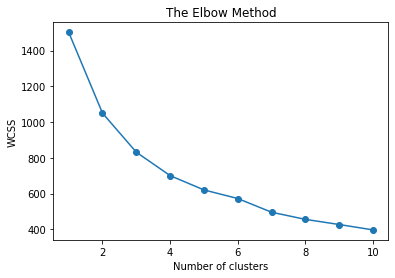

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Silhouette Validation

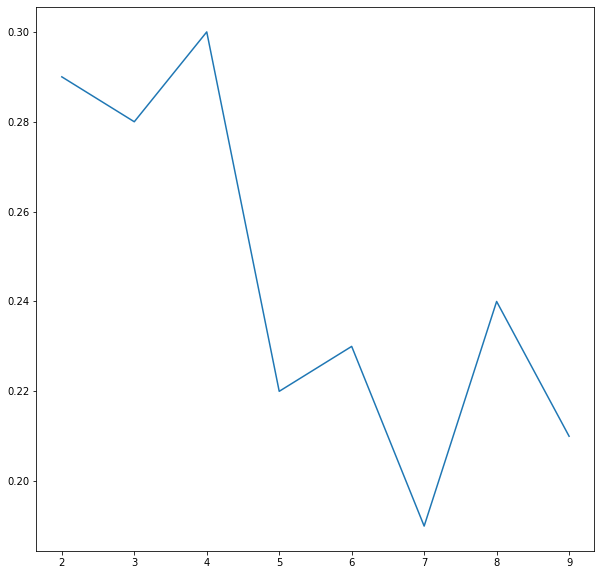

In [39]:
#From elbow plot, k=3,4 and 5 is the elbow points and it is used to determine the value of k - clustering. to decide one of these two, we go for silhouette_score
from sklearn.metrics import silhouette_score
score=[]
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(x)
    score.append(np.round(silhouette_score(x,k.labels_),2))
plt.plot(range(2,10),score)
plt.show()

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
Here we can see 4 gives the highest score, so we go for k value 4(k=4).

#### predict the number of cluster

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [14]:
print(y_kmeans)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


Here we get pridict values, means predict cluster number which "country" or groups belongs to which cluster.
so, first row belongs to second cluster,second cluster belongs to first cluster like that.(here 1 meas 2nd and 0 means 1st cluster so on)

In [15]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Add the k-means cluster in our orginal data set

In [16]:
data['cluster'] = y_kmeans
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


### Centroid vlaues of cluster1,cluster2,cluster3 and cluster4.

In [17]:
kmeans.cluster_centers_

array([[-0.41982697,  0.00664849, -0.21172363,  0.04758146, -0.21727424,
        -0.03495325,  0.26841956, -0.43822217, -0.33080531],
       [ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

#### Display all the countries with their cluster number

In [18]:
print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')
data.loc[data['cluster']==0]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1 are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [19]:
print('Based on K-Means clustering, the countries which belongs to cluster 2 are:')
data.loc[data['cluster']==1]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 2 are:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [20]:
print('Based on K-Means clustering, the countries which belongs to cluster 3 are:')
data.loc[data['cluster']==2]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 3 are:


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [21]:
print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')
data.loc[data['cluster']==3]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1 are:


['Luxembourg', 'Malta', 'Singapore']

### Hierarchical Clustering

Is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

### Using the dendrogram to find the optimal number of clusters

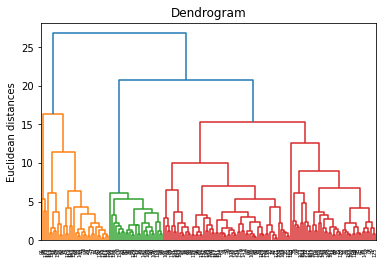

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

#### By the Dendrogram graph we can't actually find the correct k value, so we can go for shilhouette validation

#### Silhouette Validation

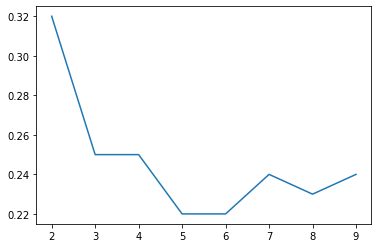

In [23]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,10):
    hc=AgglomerativeClustering(i)
    hc.fit(x)
    score.append(np.round(silhouette_score(x,hc.labels_),2))
plt.plot(range(2,10),score)
plt.show()

##### Here we got 2 is good for k (cluster)

In [24]:
res = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_res = res.fit_predict(x)

In [25]:
print(y_res)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [26]:
data['hier_cluster'] = y_res

In [27]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0


In [28]:
print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')
data.loc[data['hier_cluster']==0]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1 are:


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania',
 'Macedonia, FYR',
 

In [29]:
print('Based on K-Means clustering, the countries which belongs to cluster 2 are:')
data.loc[data['hier_cluster']==1]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 2 are:


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Libya',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Portugal',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

Conclusion: By this two cluster algorithm we can say, which countries,the CEO needs to focus on the most.
We can labeled in k-means clustering cluster -> 0 as first-help needed countries cluster1->second hlep needed countries so on..

And By Hierarchical Clustering we get two clustering, when we have cluster 0, we can labeled as first-help needed countris and cluster 1 -> second needed help countries (second priority).

In [30]:
def func(x):
    if x==0:
        return "first-help needed country" 
    elif x==1:
        return "second-help needed country"
    elif x==2:
        return "Third-help needed country"
    else:
        return 'No Help needed'
data['k-cluster']=data['cluster'].map(lambda x: func(x))

In [31]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_cluster,k-cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,second-help needed country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,first-help needed country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,first-help needed country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,second-help needed country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,first-help needed country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,first-help needed country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,first-help needed country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,first-help needed country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,second-help needed country


In [32]:
data = data.drop('cluster',axis=1)

In [33]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster,k-cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,second-help needed country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,first-help needed country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,first-help needed country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,second-help needed country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,first-help needed country
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,first-help needed country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,first-help needed country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,first-help needed country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,second-help needed country


In [34]:
##for Hierarchical Clustering

In [35]:
def func(x):
    if x==0:
        return 'first-help needed country'
    else:
        return 'second-help needed country'
data['hierarchical_cluster']=data['hier_cluster'].map(lambda x: func(x))

In [36]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster,k-cluster,hierarchical_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,second-help needed country,first-help needed country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,first-help needed country,first-help needed country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,first-help needed country,first-help needed country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,second-help needed country,first-help needed country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,first-help needed country,first-help needed country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,first-help needed country,first-help needed country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,first-help needed country,first-help needed country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,first-help needed country,first-help needed country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,second-help needed country,first-help needed country


In [37]:
data = data.drop('hier_cluster',axis=1)

In [38]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k-cluster,hierarchical_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,second-help needed country,first-help needed country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,first-help needed country,first-help needed country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,first-help needed country,first-help needed country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,second-help needed country,first-help needed country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,first-help needed country,first-help needed country
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,first-help needed country,first-help needed country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,first-help needed country,first-help needed country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,first-help needed country,first-help needed country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,second-help needed country,first-help needed country


<img src="https://linguaholic.com/linguablog/wp-content/uploads/2021/03/A-Huge-Thank-You-720x405.jpeg.webp" width="400" height="300">